In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"D:\ML projects\Customer_Segmentation\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f"Total Number of Rows: ",data.shape[0])
print(f"Total Numbers Of Coloumns: ",data.shape[1])

Total Number of Rows:  200
Total Numbers Of Coloumns:  5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
X = data.drop('CustomerID', axis=1)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [8]:
X.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
X.drop_duplicates()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [11]:
ss = []
K_range = range(1,15)

for i in K_range:
    kmeanss = KMeans(n_clusters=i,random_state=42)
    kmeanss.fit(X)
    ss.append(kmeanss.inertia_)

In [12]:
ss

[308862.06000000006,
 221136.4418859649,
 158794.22150162974,
 104414.67534220168,
 97260.47893018977,
 68324.8224330509,
 51496.86065374506,
 44687.235534005464,
 42129.07384501383,
 38425.979654159426,
 36568.279739410915,
 35290.38132671251,
 32355.803679653684,
 30772.49653679654]

Text(0.5, 1.0, 'Elbow Method for Best K')

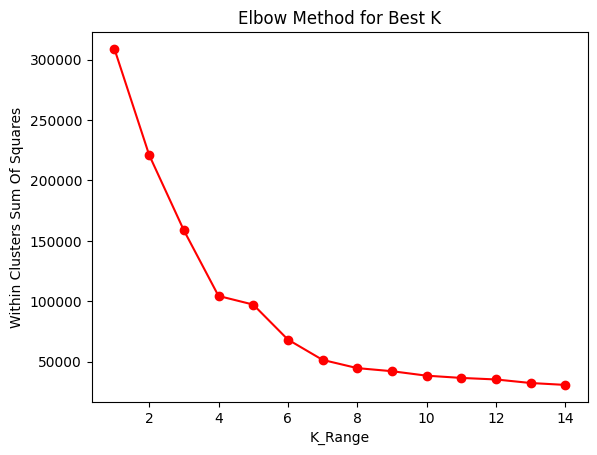

In [13]:
plt.plot(K_range, ss, marker ="o", color='red')
plt.xlabel("K_Range")
plt.ylabel("Within Clusters Sum Of Squares")
plt.title("Elbow Method for Best K")

In [14]:
Km = KMeans(n_clusters=6,random_state=42)

In [15]:
clusterslabels = Km.fit_predict(X)

In [16]:
clusterslabels

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

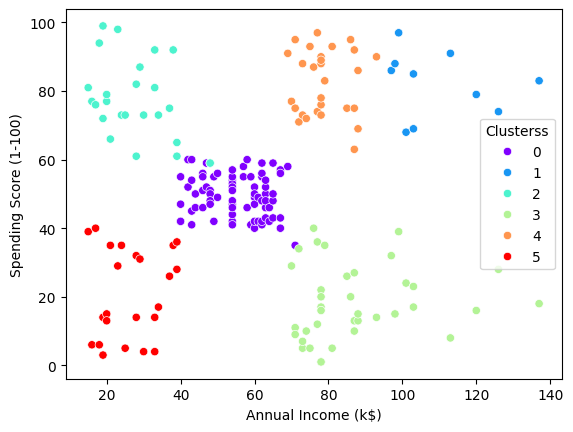

In [17]:
X['Clusterss'] = clusterslabels
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=X['Clusterss'], palette='rainbow')

In [18]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusterss
0,0,19,15,39,5
1,0,21,15,81,2
2,1,20,16,6,5
3,1,23,16,77,2
4,1,31,17,40,5


In [21]:
X['Segments'] = X['Clusterss'].map({
    5: 'Budget Conscious',
    1: 'Luxury Shoppers',
    3: 'Careful Spenders',
    4: 'Active Buyers',
    0: 'Average Buyers',
    2: 'Impulsive Shoppers'
})

In [22]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusterss,Segments
0,0,19,15,39,5,Budget Conscious
1,0,21,15,81,2,Impulsive Shoppers
2,1,20,16,6,5,Budget Conscious
3,1,23,16,77,2,Impulsive Shoppers
4,1,31,17,40,5,Budget Conscious


In [24]:
cluster_means = X.groupby('Clusterss')[['Annual Income (k$)','Spending Score (1-100)']].mean()
print(cluster_means.sort_values(by='Spending Score (1-100)', ascending=False))

           Annual Income (k$)  Spending Score (1-100)
Clusterss                                            
4                   78.551724               82.172414
1                  109.700000               82.000000
2                   28.040000               77.000000
0                   55.210526               49.447368
5                   26.304348               20.913043
3                   87.432432               18.189189
